<a href="https://colab.research.google.com/github/Sawani830/Uber-Stock-Data-Analysis-Project/blob/main/Uber_Stocks_Analysis_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Installing the forecast library
install.packages("forecast")

# Load required libraries
library(readr)
library(dplyr)
library(ggplot2)
library(lubridate)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Import data
uber_data <- read_csv('uber_stock_data.csv')

# Inspect data
print(head(uber_data))
print(summary(uber_data))

Rows: 1444 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (6): Adj Close, Close, High, Low, Open, Volume
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 7
  Date       `Adj Close` Close  High   Low  Open    Volume
  <date>           <dbl> <dbl> <dbl> <dbl> <dbl>     <dbl>
1 2019-05-10        41.6  41.6  45    41.1  42   186322500
2 2019-05-13        37.1  37.1  39.2  36.1  38.8  79442400
3 2019-05-14        40.0  40.0  40.0  36.8  38.3  46661100
4 2019-05-15        41.3  41.3  41.9  39.0  39.4  36086100
5 2019-05-16        43    43    44.1  41.2  41.5  38115500
6 2019-05-17        41.9  41.9  43.3  41.3  42.0  20225700
      Date              Adj Close         Close            High      
 Min.   :2019-05-10   Min.   :14.82   Min.   :14.82   Min.   :17.80  
 1st Qu.:2020-10-13   1st Qu.:31.93   1st Qu.:31.93   1st Qu.:32.65  
 Median :2022-03-21   Median :41.35   Median :41.35   Median :41.91  
 Mean   :2022-03-22   Mean   :44.47   Mean   :44.47   Mean   :45.29  
 3rd Qu.:2023-08-28   3rd Qu.:54.72   3rd Qu.:54.72   3rd Qu.:55.63  
 Max.   :2025-02-05   Max.   :86.34   Max.   :86.34   Max.   :87.00  
      Low           

In [4]:
# Convert 'Date' column to Date type
uber_data$Date <- as.Date(uber_data$Date)

# Check for missing values
print(colSums(is.na(uber_data)))

     Date Adj Close     Close      High       Low      Open    Volume 
        0         0         0         0         0         0         0 


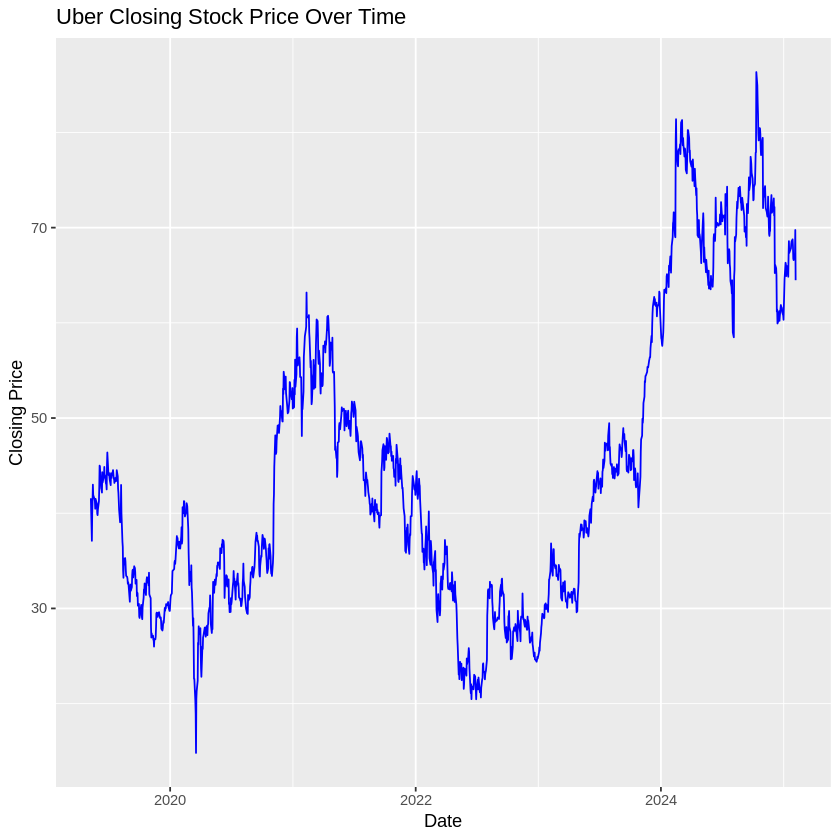

In [5]:
# Exploratory Data Analysis (EDA)
# Plot closing price over time
ggplot(uber_data, aes(x = Date, y = Close)) +
  geom_line(color = 'blue') +
  labs(title = 'Uber Closing Stock Price Over Time', x = 'Date', y = 'Closing Price')

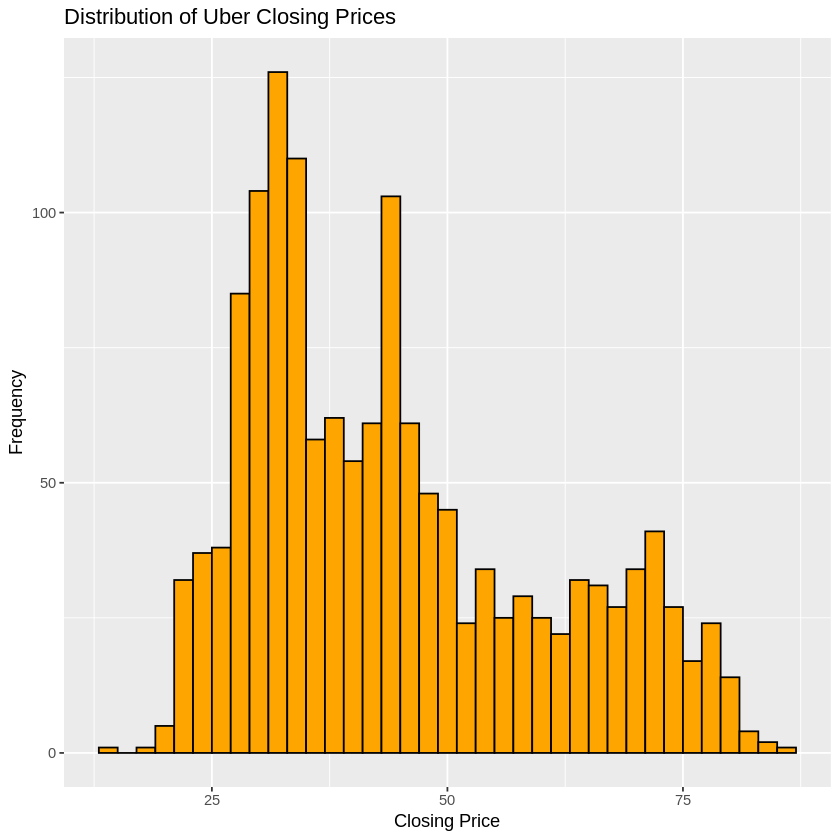

In [6]:
# Histogram of Closing Price
ggplot(uber_data, aes(x = Close)) +
  geom_histogram(binwidth = 2, fill = 'orange', color = 'black') +
  labs(title = 'Distribution of Uber Closing Prices', x = 'Closing Price', y = 'Frequency')

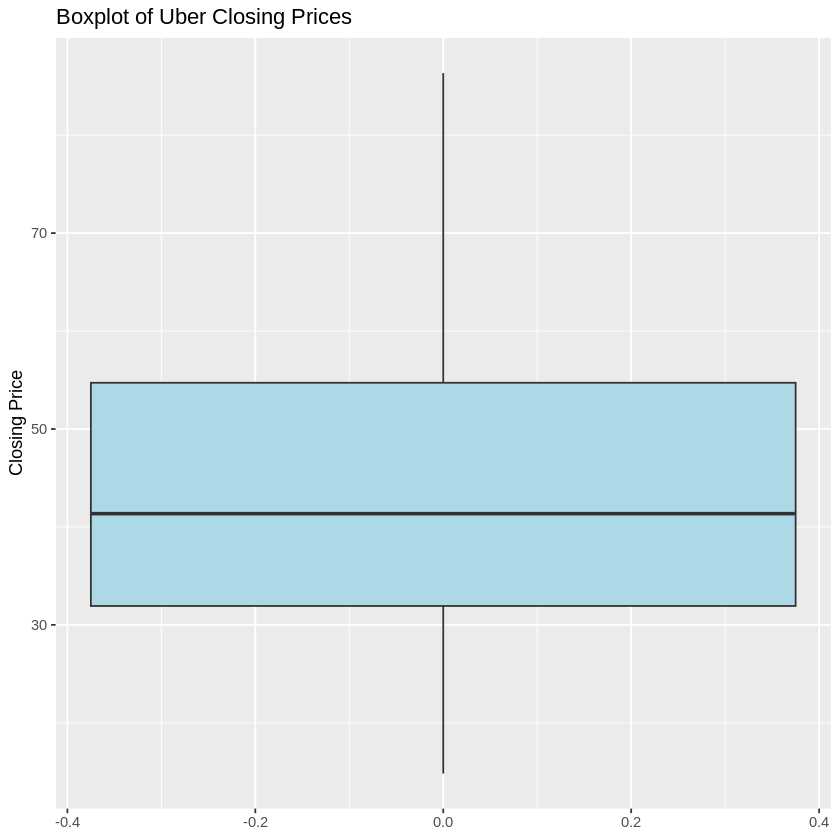

In [7]:
# Boxplot of Stock Prices
ggplot(uber_data, aes(y = Close)) +
  geom_boxplot(fill = 'lightblue') +
  labs(title = 'Boxplot of Uber Closing Prices', y = 'Closing Price')

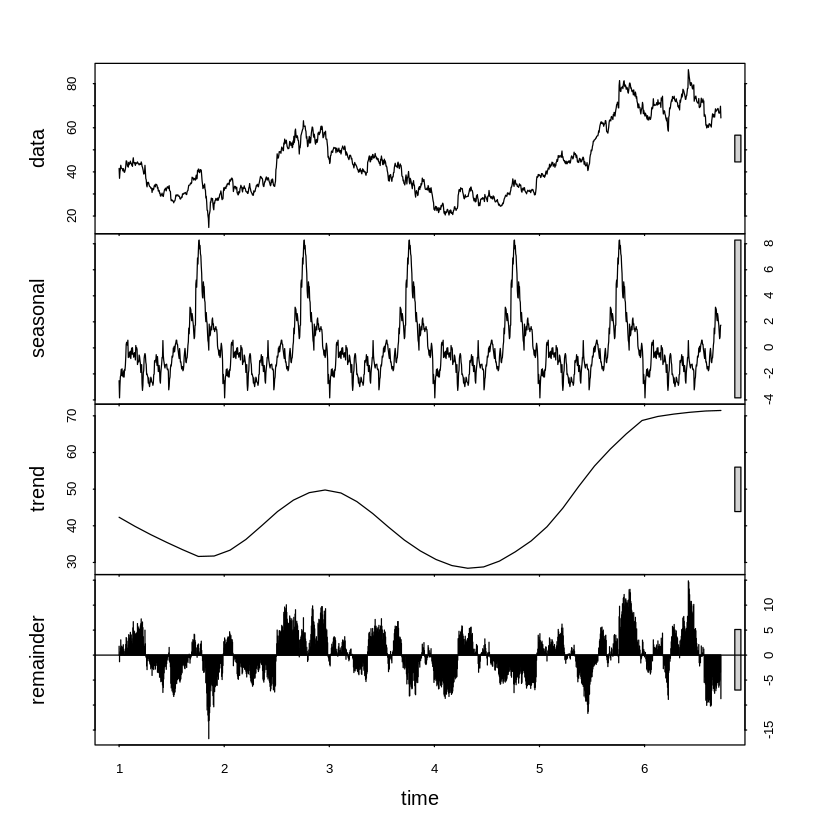

In [9]:
# Time series analysis
uber_ts <- ts(uber_data$Close, frequency = 252) # Approx. trading days per year

# Decompose time series
decomposed <- stl(uber_ts, s.window = 'periodic')
plot(decomposed)

Series: uber_ts 
ARIMA(2,1,0) 

Coefficients:
          ar1     ar2
      -0.0112  0.0228
s.e.   0.0266  0.0266

sigma^2 = 1.767:  log likelihood = -2457.33
AIC=4920.67   AICc=4920.68   BIC=4936.49

Training set error measures:
                     ME     RMSE       MAE         MPE     MAPE       MASE
Training set 0.01570694 1.327967 0.9521773 -0.02382357 2.309836 0.05210076
                     ACF1
Training set 0.0003975048

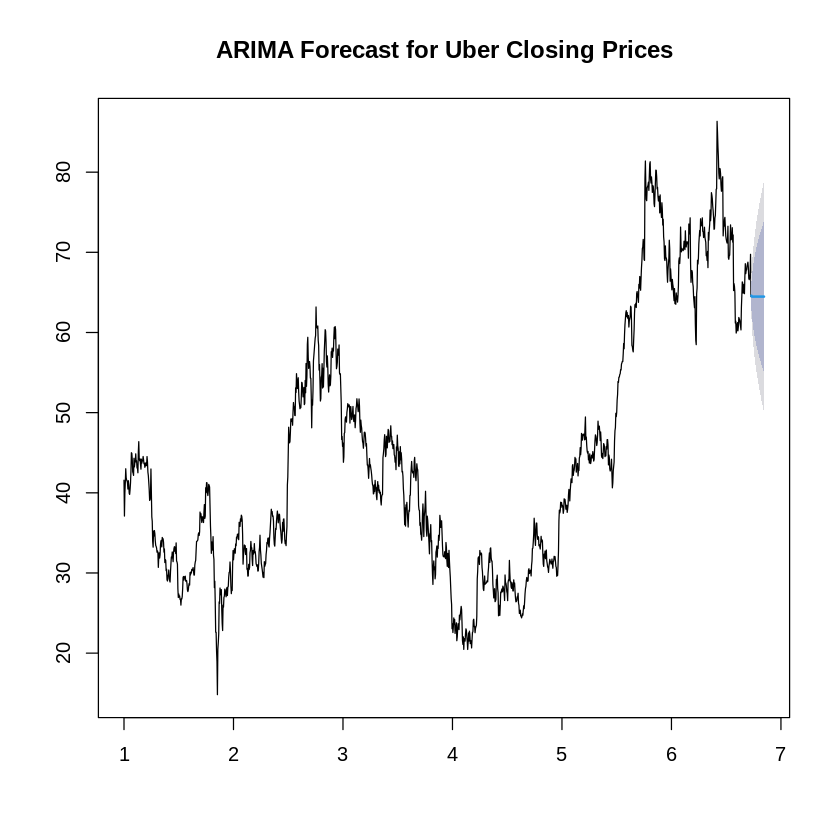

In [10]:
# Forecasting using ARIMA
model <- auto.arima(uber_ts)
forecasted <- forecast(model, h = 30)  # Forecast next 30 days
plot(forecasted, main = 'ARIMA Forecast for Uber Closing Prices')

# Summary of ARIMA model
summary(model)